In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('crop_yield.csv')

In [ ]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
df = df.drop('Production',axis=1)

In [ ]:
numerical_features = ['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
category_columns = df.select_dtypes(include = ['object']).columns
df = pd.get_dummies(df, columns = category_columns, drop_first=True)

In [ ]:
df.head()

,Crop_Year,Area,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,-1.866375,-0.144802,0.751197,-0.179880,-0.121745,0.796087,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.866375,-0.236473,0.751197,-0.247217,-0.219385,0.710435,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.866375,-0.244443,0.751197,-0.253072,-0.227875,0.238333,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.866375,-0.218707,0.751197,-0.234167,-0.200462,5238.051739,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.866375,-0.243157,0.751197,-0.252127,-0.226504,0.420909,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df.drop('Yield',axis=1)
y = df['Yield']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [ ]:
knn = KNeighborsRegressor()
scaler = StandardScaler()
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)
k_values = list(range(1,20))
param_grid = {'knn__n_neighbors':k_values}

In [ ]:
model_cv_1 = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
model_cv_1.fit(X_train,y_train)
model_cv_1.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsRegressor(n_neighbors=2))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsRegressor(n_neighbors=2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 2,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [ ]:
knn2 = KNeighborsRegressor(n_neighbors=2)
operations = [('scaler',scaler),('knn2',knn2)]
model1 = Pipeline(operations)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

109.37579140727414

In [ ]:
r2_score(y_test,y_pred)

0.985069310365207

Cross-Validation RMSE: [354.02920669 227.64564909   8.87581159 320.30126864  83.06114473]
Mean CV RMSE: 198.78261614679252


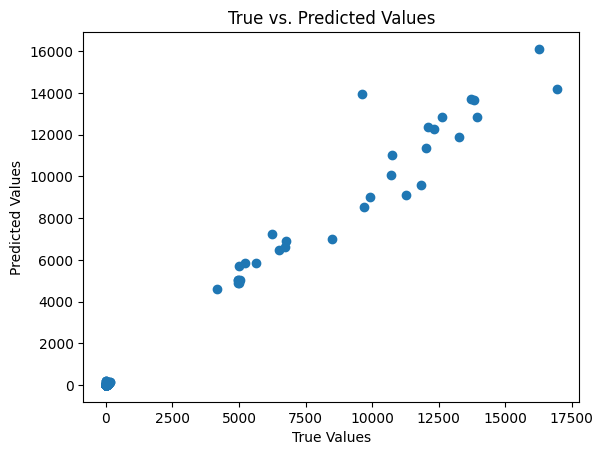

In [ ]:
cv_scores = cross_val_score(knn2, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores)**0.5
print("Cross-Validation RMSE:", cv_rmse)
print("Mean CV RMSE:", cv_rmse.mean())

# Plot predicted vs. true values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.show()

In [ ]:
#RF
rfr = RandomForestRegressor(n_estimators=250)

In [ ]:
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250)

In [ ]:
y_pred = rfr.predict(X_test)
r2_score(y_test,y_pred)

0.9798800434514826

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

126.9681506004263

In [ ]:
#DT
from sklearn.tree import DecisionTreeRegressor
DecisionTree = DecisionTreeRegressor()

In [ ]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(estimator=rfr, param_grid=param_grid)

In [ ]:
DecisionTree.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = DecisionTree.predict(X_test)
r2_score(y_test,y_pred)

0.959180452953634

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

180.84868913277566